<a href="https://colab.research.google.com/github/Kulisara-m/229352-StatisticalLearning/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

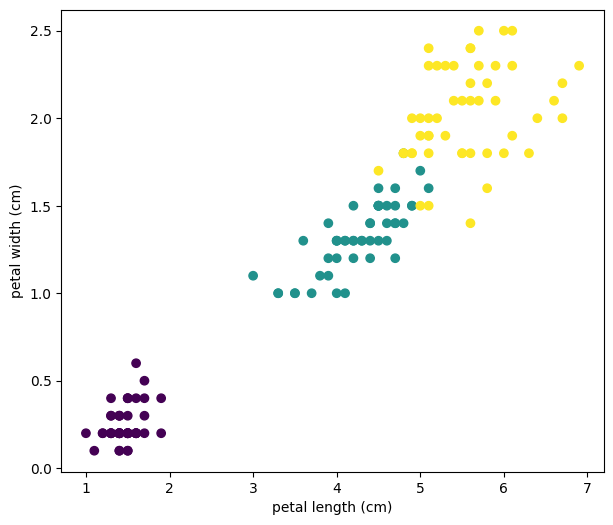

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

In [9]:
linear_svc1 = LinearSVC(C=0.01, loss='hinge', max_iter=100000)
linear_svc2 = LinearSVC(C=0.1, loss='hinge', max_iter=100000)
linear_svc3= LinearSVC(C=1, loss='hinge', max_iter=100000)
linear_svc4 = LinearSVC(C=10, loss='hinge', max_iter=100000)
linear_svc5 = LinearSVC(C=100, loss='hinge', max_iter=100000)

Test error for LinearSVC with C=0.01: 0.5555555555555556


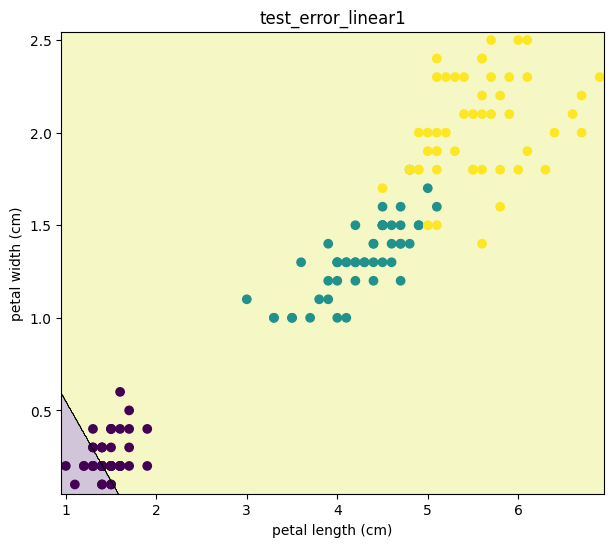

In [21]:
linear_svc1.fit(X_train, y_train)
test_accuracy_linear1 = linear_svc1.score(X_test, y_test)
test_error_linear1 = 1 - test_accuracy_linear1
print(f"Test error for LinearSVC with C=0.01: {test_error_linear1}")

plot_decision_boundary(linear_svc1, X, y)
plt.title(f'test_error_linear1')
plt.show()

Test error for LinearSVC with C=0.1: 0.28888888888888886


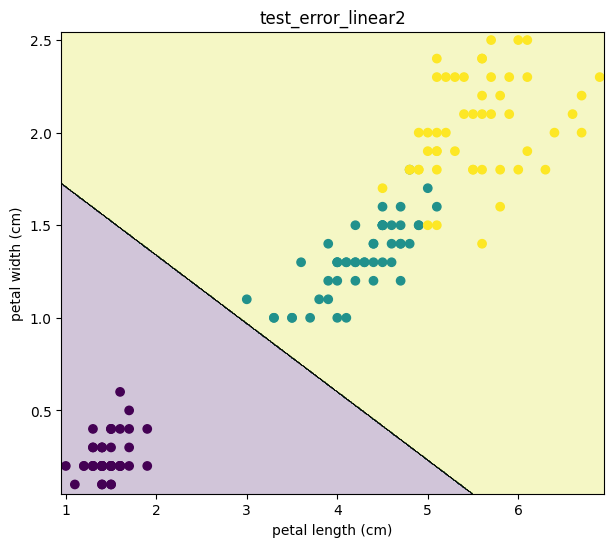

In [22]:
linear_svc2.fit(X_train, y_train)
test_accuracy_linear2 = linear_svc2.score(X_test, y_test)
test_error_linear2 = 1 - test_accuracy_linear2
print(f"Test error for LinearSVC with C=0.1: {test_error_linear2}")

plot_decision_boundary(linear_svc2, X, y)
plt.title(f'test_error_linear2')
plt.show()

Test error for LinearSVC with C=1: 0.24444444444444446


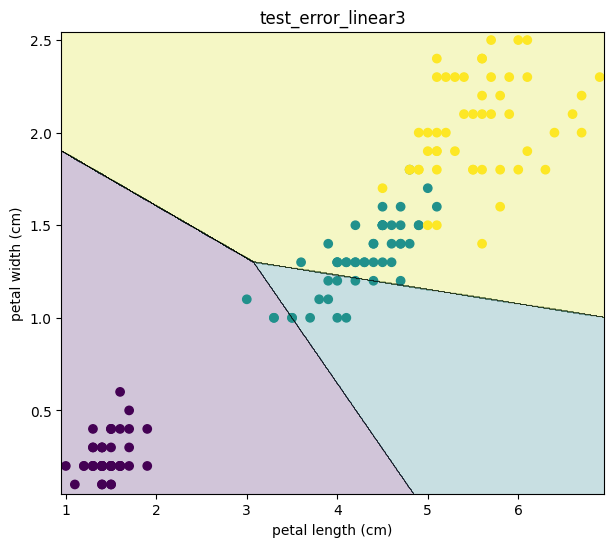

In [23]:
linear_svc3.fit(X_train, y_train)
test_accuracy_linear3 = linear_svc3.score(X_test, y_test)
test_error_linear3 = 1 - test_accuracy_linear3
print(f"Test error for LinearSVC with C=1: {test_error_linear3}")

plot_decision_boundary(linear_svc3, X, y)
plt.title(f'test_error_linear3')
plt.show()

Test error for LinearSVC with C=10: 0.15555555555555556


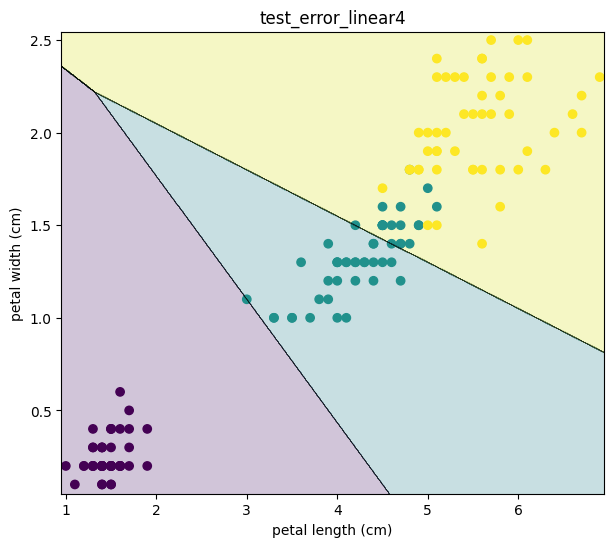

In [24]:
linear_svc4.fit(X_train, y_train)
test_accuracy_linear4 = linear_svc4.score(X_test, y_test)
test_error_linear4 = 1 - test_accuracy_linear4
print(f"Test error for LinearSVC with C=10: {test_error_linear4}")

plot_decision_boundary(linear_svc4, X, y)
plt.title(f'test_error_linear4')
plt.show()

Test error for LinearSVC with C=100: 0.0888888888888889


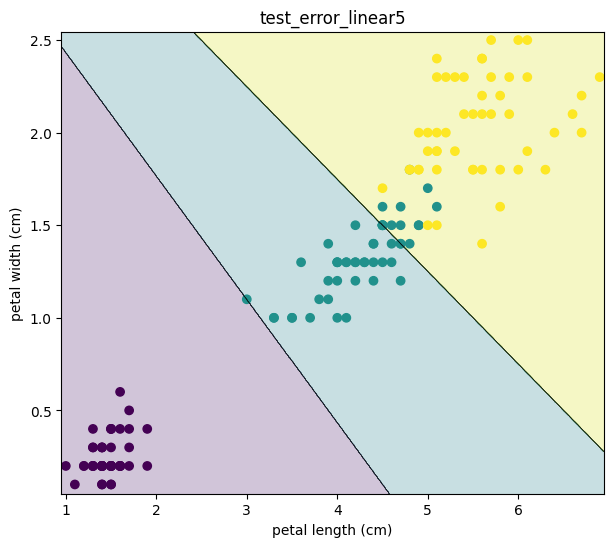

In [25]:
linear_svc5.fit(X_train, y_train)
test_accuracy_linear5 = linear_svc5.score(X_test, y_test)
test_error_linear5 = 1 - test_accuracy_linear5
print(f"Test error for LinearSVC with C=100: {test_error_linear5}")

plot_decision_boundary(linear_svc5, X, y)
plt.title(f'test_error_linear5')
plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

เลือก C = 100 เพราะค่า error น้อยสุด

In [26]:
print(f"Test error for LinearSVC with C=100: {test_error_linear5}")

Test error for LinearSVC with C=100: 0.0888888888888889


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

In [29]:
svc_kernel1 = SVC(kernel='rbf', C=1, gamma=0.01, max_iter=100000)
svc_kernel2 = SVC(kernel='rbf', C=1, gamma=0.1, max_iter=100000)
svc_kernel3 = SVC(kernel='rbf', C=1, gamma=1, max_iter=100000)
svc_kernel4 = SVC(kernel='rbf', C=1, gamma=10, max_iter=100000)
svc_kernel5 = SVC(kernel='rbf', C=1, gamma=100, max_iter=100000)

In [30]:
svc_kernel1.fit(X_train, y_train)
svc_kernel2.fit(X_train, y_train)
svc_kernel3.fit(X_train, y_train)
svc_kernel4.fit(X_train, y_train)
svc_kernel5.fit(X_train, y_train)

SVC(C=1, gamma=100, max_iter=100000)

In [34]:
test_accuracy_kernel1 = svc_kernel1.score(X_test, y_test)
test_error_kernel1 = 1 - test_accuracy_kernel1

test_accuracy_kernel2 = svc_kernel2.score(X_test, y_test)
test_error_kernel2 = 1 - test_accuracy_kernel2

test_accuracy_kernel3 = svc_kernel3.score(X_test, y_test)
test_error_kernel3 = 1 - test_accuracy_kernel3

test_accuracy_kernel4 = svc_kernel4.score(X_test, y_test)
test_error_kernel4 = 1 - test_accuracy_kernel4

test_accuracy_kernel5 = svc_kernel5.score(X_test, y_test)
test_error_kernel5 = 1 - test_accuracy_kernel5

print(f"Test error for svc kernel with gamma=0.01: {test_error_kernel1}")
print(f"Test error for svc kernel with gamma=0.1: {test_error_kernel2}")
print(f"Test error for svc kernel with gamma=1: {test_error_kernel3}")
print(f"Test error for svc kernel with gamma=10: {test_error_kernel4}")
print(f"Test error for svc kernel with gamma=100: {test_error_kernel5}")

Test error for svc kernel with gamma=0.01: 0.0
Test error for svc kernel with gamma=0.1: 0.0
Test error for svc kernel with gamma=1: 0.0
Test error for svc kernel with gamma=10: 0.0
Test error for svc kernel with gamma=100: 0.1333333333333333


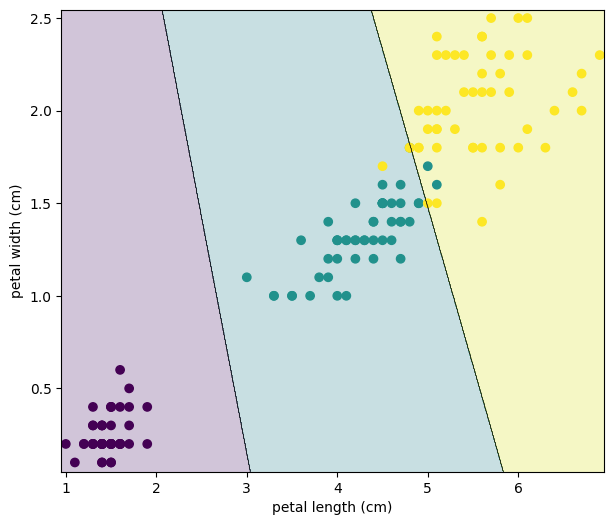

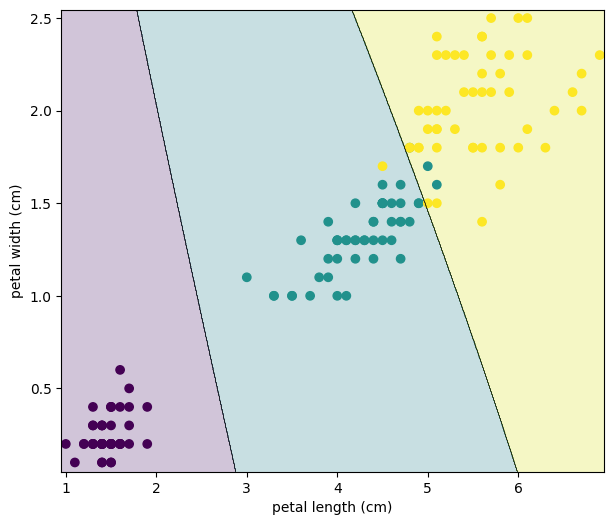

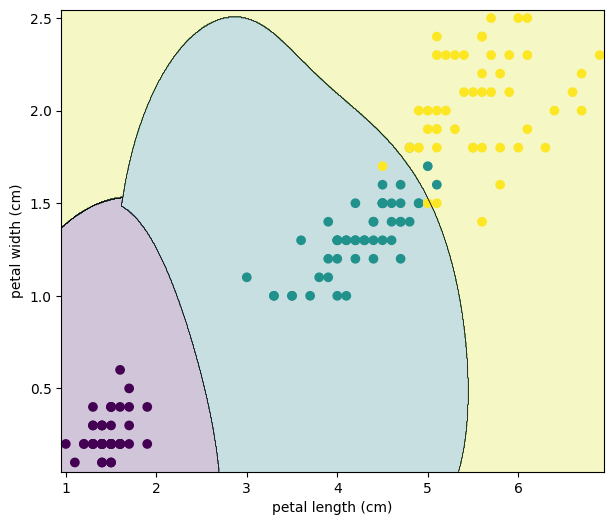

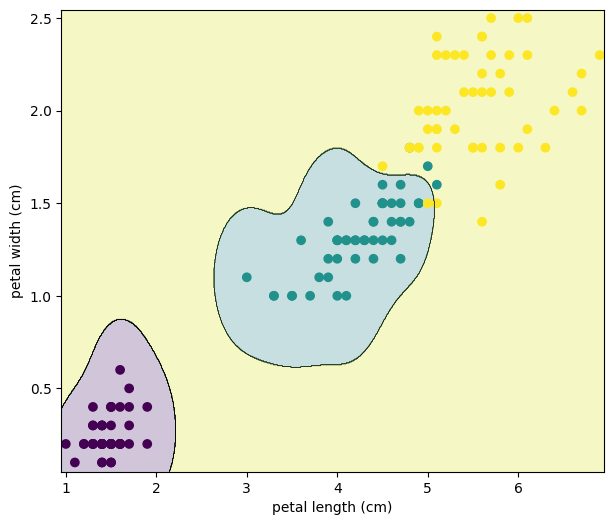

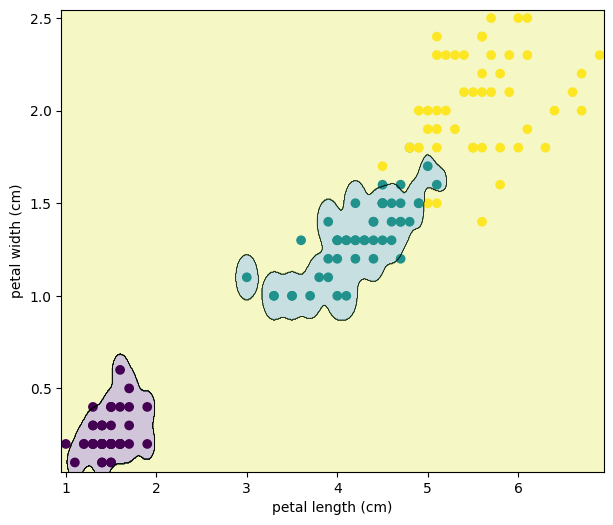

In [35]:
plot_decision_boundary(svc_kernel1, X, y)
plot_decision_boundary(svc_kernel2, X, y)
plot_decision_boundary(svc_kernel3, X, y)
plot_decision_boundary(svc_kernel4, X, y)
plot_decision_boundary(svc_kernel5, X, y)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

เลือก gamma = 0.01, 0.1, 1, 10

In [41]:
print(f"Test error for svc kernel with gamma=0.01: {test_error_kernel1}")
print(f"Test error for svc kernel with gamma=0.1: {test_error_kernel2}")
print(f"Test error for svc kernel with gamma=1: {test_error_kernel3}")
print(f"Test error for svc kernel with gamma=10: {test_error_kernel4}")

Test error for svc kernel with gamma=0.01: 0.0
Test error for svc kernel with gamma=0.1: 0.0
Test error for svc kernel with gamma=1: 0.0
Test error for svc kernel with gamma=10: 0.0


In [40]:
print(f"Number of support vectors for svc kernel with gamma=0.01: {svc_kernel1.n_support_}")
print(f"Number of support vectors for svc kernel with gamma=0.1: {svc_kernel2.n_support_}")
print(f"Number of support vectors for svc kernel with gamma=1: {svc_kernel3.n_support_}")
print(f"Number of support vectors for svc kernel with gamma=10: {svc_kernel4.n_support_}")

Number of support vectors for svc kernel with gamma=0.01: [16 37 32]
Number of support vectors for svc kernel with gamma=0.1: [ 4 20 17]
Number of support vectors for svc kernel with gamma=1: [ 3 11 14]
Number of support vectors for svc kernel with gamma=10: [ 7 20 26]


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

Accuracy test:

Linear SVC  (C = 100) มี accuracy ดีที่สุด, มีค่า error = 0.089

Kernel SVC (gamma = 0.01, 0.1, 1.0, 10.0 และ C = 1) มี accuracy  = 1, มีค่า error = 1

สรุป Kernel SVC ทำงานได้ดีกว่า Linear SVC ในข้อมูลชุดนี้

Decision Boundary Plot:

Linear SVM สร้างเส้นตรงในการแยกคลาส ใช้ได้กับข้อมูล แต่มีบางจุดที่จำแนกผิด โดยเฉพาะตรงที่ข้อมูลไม่สามารถแยกด้วยเส้นตรงได้ดี

Kernel SVM สามารถสร้างเส้นขอบเขตแบบไม่เป็นเส้นตรง ทำให้จำแนกคลาสได้ดีกว่า

ค่า gamma น้อย (เช่น 0.01, 0.1, 1.0, 10.0) ให้เส้นขอบเขตที่เรียบ และแยกข้อมูลได้ดี ส่งผลให้ test error เท่ากับ 0 บางค่า

ค่า gamma มาก (เช่น 100) ทำให้ขอบเขตซับซ้อนเกินไป ทำให้ overfit และ test error เพิ่มขึ้น